## Ki-67 Index Estimation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from skimage.color import rgb2gray
from skimage.measure import label, regionprops_table

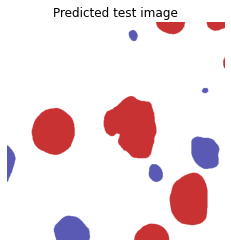

In [2]:
image = Image.open('test_predicted.png')
image = np.array(image.convert('RGB'))
plt.axis('off')
plt.title('Predicted test image')
plt.imshow(image);

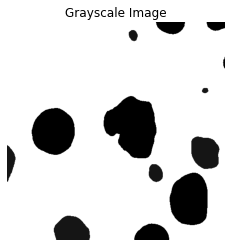

In [9]:
image_gray = rgb2gray(image)
plt.imshow(image_gray,cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

In [10]:
np.unique(image_gray*255)

array([ 81.875,  96.489, 255.   ])

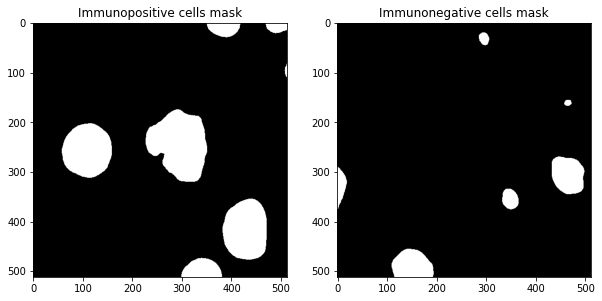

In [13]:
tumour_mask = image_gray*255 < 90
negative_mask = (image_gray*255 < 100) & (image_gray*255>95)
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(tumour_mask, cmap = 'gray');
axs[0].set_title('Immunopositive cells mask')
axs[1].imshow(negative_mask, cmap = 'gray');
axs[1].set_title('Immunonegative cells mask')
plt.show()

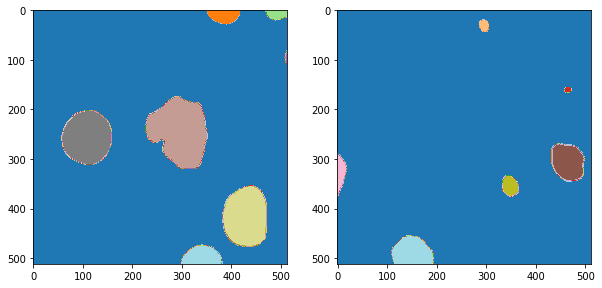

In [6]:
tumour_blobs = label(tumour_mask > 0)
negative_blobs = label(negative_mask > 0)

fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].imshow(tumour_blobs, cmap = 'tab20');
axs[1].imshow(negative_blobs, cmap = 'tab20');
plt.show()

In [7]:
tumour_df = pd.DataFrame(regionprops_table(tumour_blobs))
negative_df = pd.DataFrame(regionprops_table(negative_blobs))
len(tumour_df), len(negative_df)

(7, 6)

In [8]:
Ki_67 = len(tumour_df)/ (len(tumour_df) + len(negative_df))* 100
print("Ki-67 Index: {:.2f}".format(Ki_67))

Ki-67 Index: 53.85
